## Ejercici 6 ##

Para empezar se inicializan las librerías que se necesitarán en el proyecto, y la función para imprimir los valores de salida

In [22]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import scipy as sp

Se incializan las variables propuestas en el enunciado del ejercicio

In [23]:
# Variables del controlador 

tau = 0.001
K_p = 10
gamma = 20

Como el sistema es un PD, la parte derivativa añade error en estado estacionario, y por tanto, esta parte se tiene que minimizar. Los criterios para minimizar el error son los siguientes:
* El valor para que comienze el movimiento será m_min[n] = 0.025, para que sea un sistema que reaccione rápido
* El error de ajuste máximo será de +/- 0,2 rad.

Para calcular K_D, se puede utilizar la siguiente fórmula:
* m_min[n] > (K_d\*Incremento e[n]\*gamma)/tau

A partir de este valor del error, se puede calcular que el incremento del error será de como máximo 0,8.

Con todos estos datos en estado estacionario, se puede calcular que el valor de K_d máximo será:

In [24]:
# Se calcula K_d_max
K_d_max = (0.025*tau)/(0.8*gamma)

print("El valor de K_D_MAX es: ", K_d_max)


El valor de K_D_MAX es:  1.5625e-06


Se tomará el valor de K_D_Max - 0.1e-09 como valor de *K_D*, y de esta manera, se asegurará que el sistema cumple los valores que se han establecido.

In [30]:
# Se prueban valores de K_d
K_d = K_d_max-0.1e-09
print(K_d)

1.5624e-06


Se crea el polinomio con los valores de los coeficientes

In [26]:
# se crean los valores del polinomio
p_1 = 1
p_2 = -2
p_3 = (1 + (gamma*K_p*(tau**2)) + (gamma*K_d*tau))
p_4 = -(gamma * K_d * tau)

# Creamos un polinomio
polinomio = [p_1, p_2, p_3, p_4]   # polinomio = p_1 x^3 + p_2 x^2 + p_3 x + p_4

Con el polinomio calculado, se pueden buscar las raices.

In [27]:
# Se calculan las raices del polinomio
raices = np.roots(polinomio)

# Se muestran los valores de raices encontrados
print (raices)

[  9.99999984e-01+0.01414214j   9.99999984e-01-0.01414214j
   3.12437522e-08+0.j        ]


** De los valores que se han obtenido, se observa que su módulo está cerca del 1, pero no esta dentro de la circumferencia unitaria, por tanto, son valores que son estables.**


Por último, se muetra la gráfica de respuesta a las raices

<IPython.core.display.Javascript object>


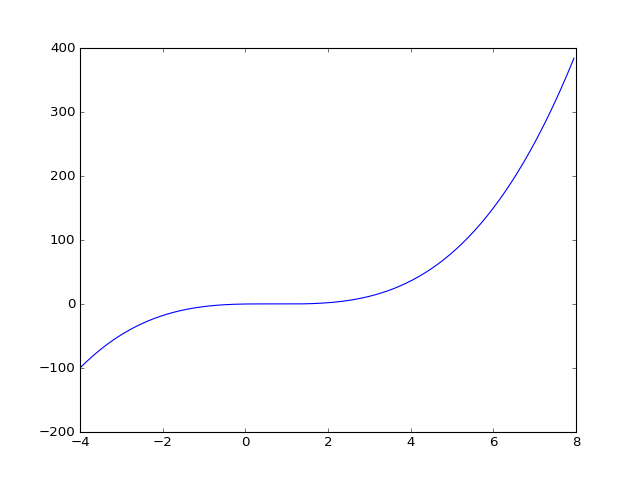

In [28]:
# Creamos un array dimensional
x = sp.arange(-4,8,.05)

#  Evaluamos el polinomio en x mediante polyval.
y = sp.polyval(polinomio,x)

# Se muestra por pantalla la gráfica de las raices.
plt.figure()
plt.plot(x,y)